In [1]:
import numpy as np
import pandas as pd
import torch

import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

from Dataset.economy import EconomyDataset
from Model.LSTM import LSTM

import matplotlib.pyplot as plt

In [2]:
# 데이터 다운 & 전처리

df = pd.read_excel('../데이터/economy/economy_all.xlsx')
df = df['국고채금리'].values

In [3]:
len_df = len(df)
train_len = int(len_df *0.6)
val_len = int(len_df * 0.3)

batch_size = 2

train_dataset = EconomyDataset(df[:train_len])
train_loader = DataLoader(train_dataset, batch_size=batch_size)

val_dataset = EconomyDataset(df[train_len:train_len+val_len])
val_loader = DataLoader(val_dataset, batch_size=batch_size)

test_dataset = EconomyDataset(df[train_len+val_len:])
test_loader = DataLoader(test_dataset, batch_size=batch_size)

c:\Users\hkyoo\OneDrive\바탕 화면\SCI\코드\Dataset\economy.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  self.x = torch.FloatTensor(X)


In [4]:
for x,y in train_loader:
  print("X 크기 : {}".format(x.shape))
  print("Y 크기 : {}".format(y.shape))
  break

X 크기 : torch.Size([2, 5])
Y 크기 : torch.Size([2])


In [7]:
input_size = 5
hidden_size = 16
Model = LSTM(input_size, hidden_size)

In [8]:
# 데이터 & 모델에 device 붙임!!!
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

model = Model.to(device)

print('작동하는지 실험')
basic_data = torch.rand((1,input_size))
model(basic_data)


cpu is available
작동하는지 실험


tensor([-0.0607], grad_fn=<SelectBackward0>)

In [9]:
criterion = nn.MSELoss()

lr = 1e-3
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epoch : 0
train
1.4968806536033237
Calculating validation results...
val
loss: 6.0856194 || 
epoch : 1
train
0.5701150727169267
Calculating validation results...
val
loss: 3.2694881 || 
epoch : 2
train


c:\Users\hkyoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.1336862648082576
Calculating validation results...
val
loss: 1.9622026 || 
epoch : 3
train
0.07069482592876362
Calculating validation results...
val
loss: 1.5871093 || 
epoch : 4
train
0.06866419611914948
Calculating validation results...
val
loss: 1.4696457 || 
epoch : 5
train
0.06391988626831664
Calculating validation results...
val
loss: 1.3818641 || 
epoch : 6
train
0.05812002533162615
Calculating validation results...
val
loss: 1.2884902 || 
epoch : 7
train
0.05293257729223616
Calculating validation results...
val
loss: 1.1959461 || 
epoch : 8
train
0.04880537309829128
Calculating validation results...
val
loss: 1.112599 || 
epoch : 9
train
0.04569308901465837
Calculating validation results...
val
loss: 1.0419299 || 
epoch : 10
train
0.04342969115093403
Calculating validation results...
val
loss: 0.98486082 || 
epoch : 11
train
0.041731806943626625
Calculating validation results...
val
loss: 0.93971498 || 
epoch : 12
train
0.04038069532594066
Calculating validation results...
va

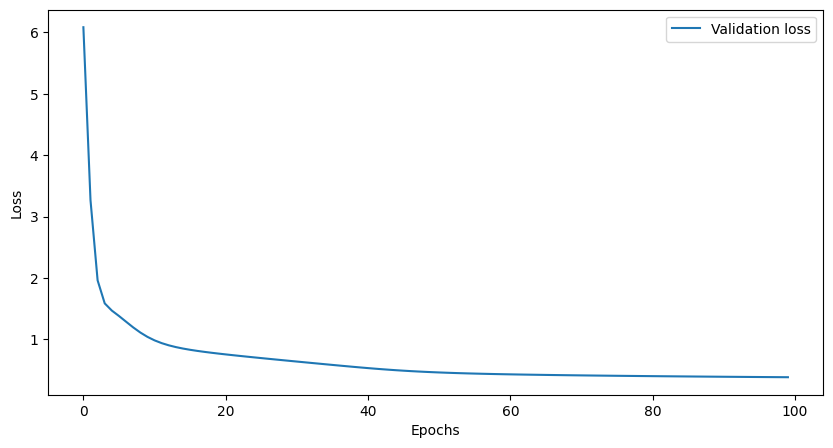

In [10]:
train_n = len(train_dataset)
val_n = len(val_dataset)

val_loss_list = []
best_val_loss = float('inf')
stop_counter = 0
stop_criteria = 3

for epoch in range(num_epochs):
    print('epoch : {}'.format(epoch))
    running_loss = 0.0
    num = 0
    print("train")
    model.train()
    for inputs, labels in train_loader:  # dataloader 함수에 def __len__에 return 값만큼 반복함
        inputs = inputs.to(device)
        labels = labels.to(device)
        out = model(inputs)
        loss = criterion(out, labels)

        optimizer.zero_grad() #
        loss.backward() # loss가 최소가 되게하는
        optimizer.step() # 어떤 방법으로 learning rate를 움직일거이냐
        running_loss += loss.item() # 한 배치의 loss 더해주고,


    print(running_loss/train_n)

    with torch.no_grad():
            print("Calculating validation results...")
            model.eval()
            val_loss = 0
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outs = model(inputs)

                loss= criterion(outs, labels)
                val_loss += loss.item()

            avg_val_loss = val_loss/val_n
            val_loss_list.append(avg_val_loss)

            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                stop_counter = 0            
                torch.save(model.state_dict(), 'Checkpoint/economic_best_model.pth')
            else:
                stop_counter += 1

            print("val")
            print(
                f"loss: {avg_val_loss:4.8} || "
            )

            if stop_counter >= stop_criteria:
                print('Early stopping triggered.')
                break
    
    print('======================================================')

plt.figure(figsize=(10, 5))
plt.plot(val_loss_list, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epoch : 0
train
0.0146474764925219
Calculating validation results...
val
loss: 0.38362353 || 
epoch : 1
train
0.014624785720461032
Calculating validation results...
val
loss: 0.38286105 || 
epoch : 2
train
0.014602677464201155
Calculating validation results...
val
loss: 0.38210963 || 
epoch : 3
train
0.014581123894709764
Calculating validation results...
val
loss: 0.38136856 || 
epoch : 4
train
0.014560100036007873
Calculating validation results...
val
loss: 0.38063804 || 
epoch : 5
train
0.014539598617908456
Calculating validation results...
val
loss: 0.37991752 || 
epoch : 6
train
0.01451960061641675
Calculating validation results...
val
loss: 0.37920662 || 
epoch : 7
train
0.014500079257263208
Calculating validation results...
val
loss: 0.37850546 || 
epoch : 8
train
0.01448102815152981
Calculating validation results...
val
loss: 0.37781319 || 
epoch : 9
train
0.014462425647597511
Calculating validation results...
val
loss: 0.37712992 || 
epoch : 10
train
0.014444259390388495
Calcul

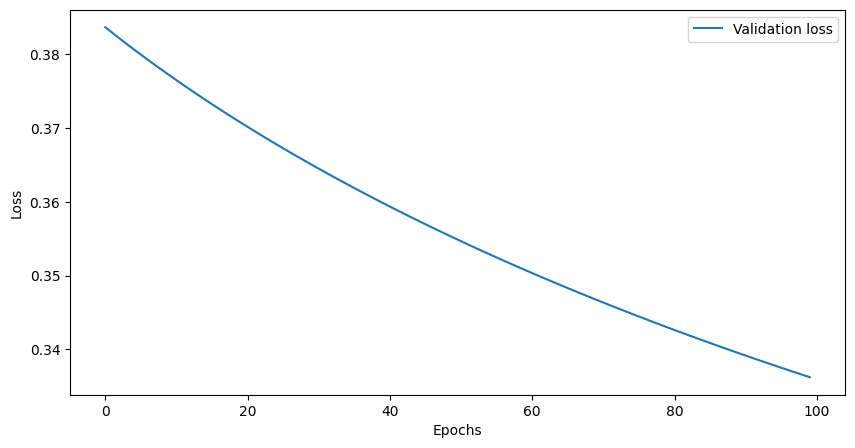

In [11]:
train_n = len(train_dataset)
val_n = len(val_dataset)

val_loss_list = []
best_val_loss = float('inf')
stop_counter = 0
stop_criteria = 3

for epoch in range(num_epochs):
    print('epoch : {}'.format(epoch))
    running_loss = 0.0
    num = 0
    print("train")
    model.train()
    for inputs, labels in train_loader:  # dataloader 함수에 def __len__에 return 값만큼 반복함
        inputs = inputs.to(device)
        labels = labels.to(device)
        out = model(inputs)
        loss = criterion(out, labels)

        optimizer.zero_grad() #
        loss.backward() # loss가 최소가 되게하는
        optimizer.step() # 어떤 방법으로 learning rate를 움직일거이냐
        running_loss += loss.item() # 한 배치의 loss 더해주고,


    print(running_loss/train_n)

    with torch.no_grad():
            print("Calculating validation results...")
            model.eval()
            val_loss = 0
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outs = model(inputs)

                loss= criterion(outs, labels)
                val_loss += loss.item()

            avg_val_loss = val_loss/val_n
            val_loss_list.append(avg_val_loss)

            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                stop_counter = 0            
                torch.save(model.state_dict(), 'Checkpoint/economic_best_model.pth')
            else:
                stop_counter += 1

            print("val")
            print(
                f"loss: {avg_val_loss:4.8} || "
            )

            if stop_counter >= stop_criteria:
                print('Early stopping triggered.')
                break
    
    print('======================================================')

plt.figure(figsize=(10, 5))
plt.plot(val_loss_list, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()